## import necessary libraries

In [ ]:
#data manipulation
import pandas as pd

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#for replacing null values
import numpy as np

#for splitting data
from sklearn.model_selection import train_test_split

#encoding
from sklearn.preprocessing import OneHotEncoder

#scaling
from sklearn.preprocessing import StandardScaler

#feature extraction
from sklearn.decomposition import PCA

#algorithms
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


#Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#Parameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


## Load and read data 

In [ ]:
cars = pd.read_csv("cars_price.csv")

In [ ]:
#view the data
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


### Correlation heatmap

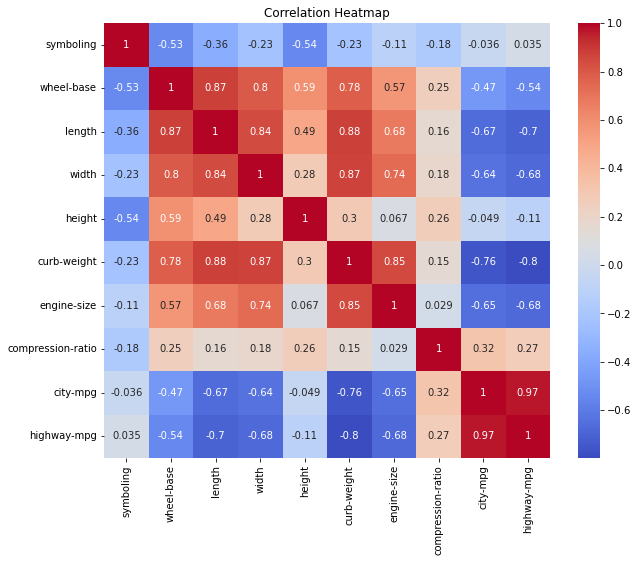

In [ ]:
# correlation_matrix

correlation_matrix = cars.corr()
plt.figure(figsize=(10, 8))  # Set the figure size to 10x8
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


## Exploratory Data Analysis

In [ ]:
#check for shape of the data
cars.shape

(205, 26)

In [ ]:
#check for basic information of data
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [ ]:
#check for statistical details of the data
cars.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [ ]:
#check for duplicate values
cars.duplicated().sum()

0

there are no dulicated values

In [ ]:
#print all the column names
cars.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [ ]:
#check for null values
cars.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In the given dataset, instead of having explicit null values, there are "?" marks present. Before proceeding with any further analysis or modeling, it is essential to convert these "?" marks to appropriate null values. For this purpose, we will utilize the NumPy library to replace "?" with np.nan.

By replacing "?" with np.nan, we can accurately represent missing or unknown values in the dataset. This step is crucial as it enables us to handle missing values appropriately during the preprocessing phase.

Once the "?" marks are converted to np.nan, we can proceed with various preprocessing techniques such as imputation, scaling, and feature selection to prepare the dataset for regression analysis.

By performing this initial data preprocessing step of converting "?" marks to null values, we ensure that missing values are properly recognized and treated, thereby enhancing the reliability and accuracy of subsequent analyses and modeling tasks.

In [ ]:
## Replace '?' with NaN in all the  columns in the dataframe
cars.replace('?', np.nan, inplace=True)

#check for null values after replacing "?" symbol
cars.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In this code, we import the NumPy library as np to use the nan function, which represents NaN values. 
We then use the replace() function to replace the '?' symbol in the data with NaN. 
The inplace=True parameter ensures that the changes are made directly in the "cars" DataFrame.

After executing this code, the '?' symbols in the data will be replaced with NaN,
allowing you to handle missing values appropriately during preprocessing.

### check for uniques values in each column

#### column : symboling

In [ ]:
#check for count of each unique value
cars["symboling"].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [ ]:
#check for null values
cars["symboling"].isnull().sum()

0

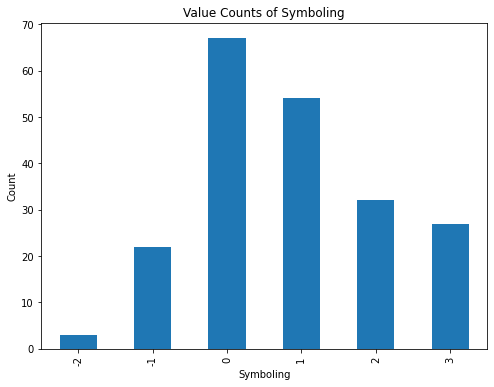

In [ ]:
# Plot the value counts of "symboling"
plt.figure(figsize=(8, 6))
cars["symboling"].value_counts().sort_index().plot(kind='bar')
plt.xlabel("Symboling")
plt.ylabel("Count")
plt.title("Value Counts of Symboling")
plt.show()


#### column : normalized-losses

In [ ]:
#checking for count of each unique value
cars["normalized-losses"].value_counts()

161    11
91      8
150     7
128     6
134     6
104     6
95      5
102     5
103     5
74      5
85      5
168     5
94      5
65      5
106     4
122     4
148     4
118     4
93      4
101     3
125     3
137     3
154     3
83      3
115     3
119     2
87      2
194     2
197     2
108     2
89      2
164     2
158     2
145     2
192     2
188     2
81      2
110     2
113     2
129     2
153     2
107     1
78      1
186     1
231     1
77      1
98      1
121     1
90      1
142     1
256     1
Name: normalized-losses, dtype: int64

In [ ]:
#check for null values
cars["normalized-losses"].isnull().sum()

41

There are 41 null values in the normalized losses column

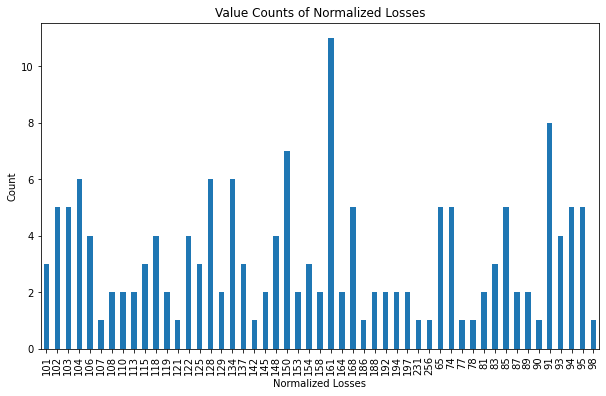

In [ ]:
# Plot the value counts of "normalized-losses"
plt.figure(figsize=(10, 6))
cars["normalized-losses"].value_counts().sort_index().plot(kind='bar')
plt.xlabel("Normalized Losses")
plt.ylabel("Count")
plt.title("Value Counts of Normalized Losses")
plt.show()


#### column : make

In [ ]:
#checking for count of each unique value
cars["make"].value_counts()

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: make, dtype: int64

In [ ]:
#check for null values
cars["make"].isnull().sum()

0

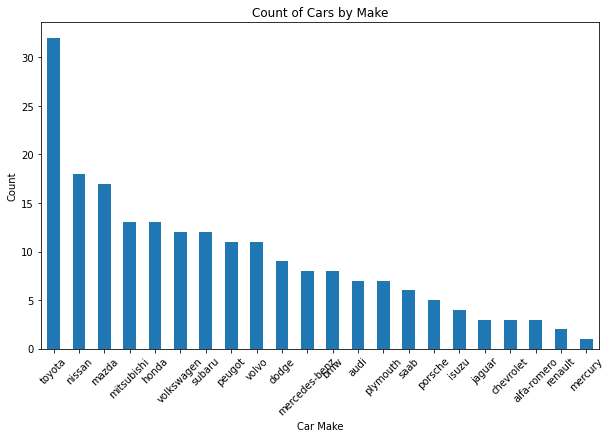

In [ ]:
make_counts = cars["make"].value_counts()

plt.figure(figsize=(10, 6))
make_counts.plot(kind='bar')
plt.xlabel("Car Make")
plt.ylabel("Count")
plt.title("Count of Cars by Make")
plt.xticks(rotation=45)
plt.show()


#### column : fuel- type

In [ ]:
#check for count of each unique value
cars["fuel-type"].value_counts()

gas       185
diesel     20
Name: fuel-type, dtype: int64

In [ ]:
#check for null values
cars["fuel-type"].isnull().sum()

0

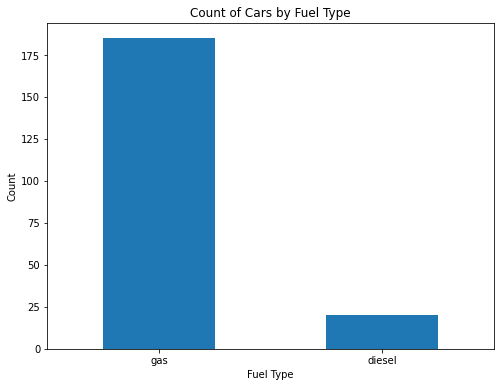

In [ ]:
fuel_type_counts = cars["fuel-type"].value_counts()

plt.figure(figsize=(8, 6))
fuel_type_counts.plot(kind='bar')
plt.xlabel("Fuel Type")
plt.ylabel("Count")
plt.title("Count of Cars by Fuel Type")
plt.xticks(rotation=0)
plt.show()


#### column : aspiration

In [ ]:
#check for count of each unique value
cars["aspiration"].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [ ]:
#check for null values
cars["aspiration"].isnull().sum()

0

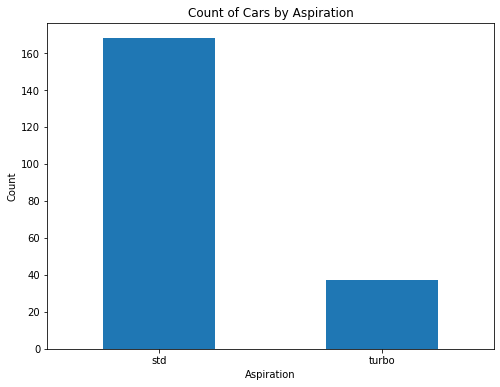

In [ ]:
aspiration_counts = cars["aspiration"].value_counts()

plt.figure(figsize=(8, 6))
aspiration_counts.plot(kind='bar')
plt.xlabel("Aspiration")
plt.ylabel("Count")
plt.title("Count of Cars by Aspiration")
plt.xticks(rotation=0)
plt.show()


#### column : num of doors

In [ ]:
#check for count of each unique value
cars["num-of-doors"].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [ ]:
#check for null values
cars["num-of-doors"].isnull().sum()

2

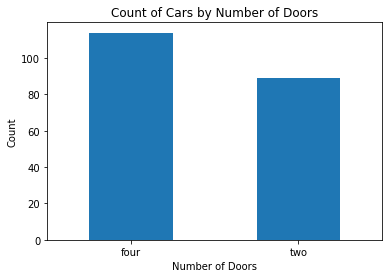

In [ ]:
num_of_doors_counts = cars["num-of-doors"].value_counts()

plt.figure(figsize=(6, 4))
num_of_doors_counts.plot(kind='bar')
plt.xlabel("Number of Doors")
plt.ylabel("Count")
plt.title("Count of Cars by Number of Doors")
plt.xticks(rotation=0)
plt.show()


#### column : body_styles

In [ ]:
#check for count of each unique value
cars["body-style"].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

In [ ]:
#check for null values
cars["body-style"].isnull().sum()

0

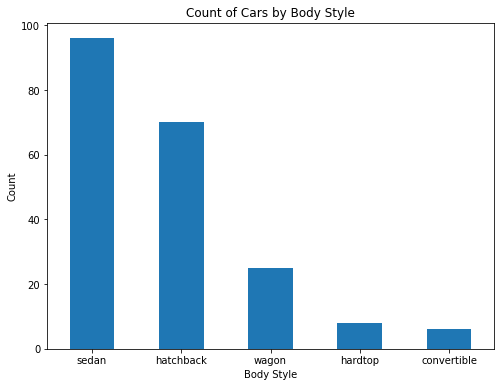

In [ ]:
body_style_counts = cars["body-style"].value_counts()

plt.figure(figsize=(8, 6))
body_style_counts.plot(kind='bar')
plt.xlabel("Body Style")
plt.ylabel("Count")
plt.title("Count of Cars by Body Style")
plt.xticks(rotation=0)
plt.show()


#### column : drive - wheels

In [ ]:
#check for count of each unique value
cars["drive-wheels"].value_counts()

fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64

In [ ]:
#check for null values
cars["drive-wheels"].isnull().sum()

0

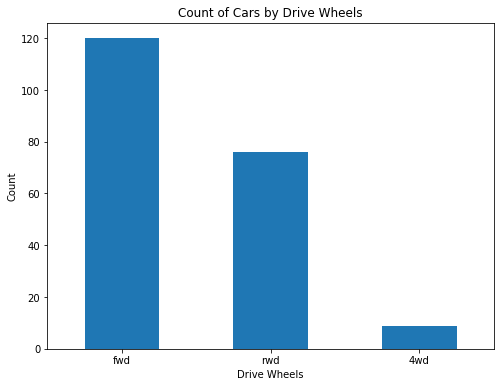

In [ ]:
drive_wheels_counts = cars["drive-wheels"].value_counts()

plt.figure(figsize=(8, 6))
drive_wheels_counts.plot(kind='bar')
plt.xlabel("Drive Wheels")
plt.ylabel("Count")
plt.title("Count of Cars by Drive Wheels")
plt.xticks(rotation=0)
plt.show()


#### column : engine- location

In [ ]:
#check for count of each unique value
cars["engine-location"].value_counts()

front    202
rear       3
Name: engine-location, dtype: int64

In [ ]:
#check for null values
cars["engine-location"].isnull().sum()

0

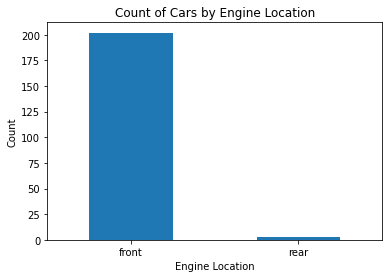

In [ ]:
engine_location_counts = cars["engine-location"].value_counts()

plt.figure(figsize=(6, 4))
engine_location_counts.plot(kind='bar')
plt.xlabel("Engine Location")
plt.ylabel("Count")
plt.title("Count of Cars by Engine Location")
plt.xticks(rotation=0)
plt.show()


The bar plot visualizes the distribution of engine locations in the dataset. From the plot, it can be observed that the majority of cars have their engines located at the front. This indicates that front-engine configuration is more prevalent among the cars in the dataset.

#### column : wheel base

In [ ]:
#check for count of each unique value
cars["wheel-base"].value_counts()

94.5     21
93.7     20
95.7     13
96.5      8
97.3      7
98.4      7
104.3     6
100.4     6
107.9     6
98.8      6
99.1      6
96.3      6
109.1     5
93.1      5
97.2      5
95.9      5
102.4     5
97.0      4
95.3      4
114.2     4
101.2     4
110.0     3
103.5     3
89.5      3
105.8     3
96.1      2
102.9     2
104.5     2
91.3      2
96.9      2
88.6      2
113.0     2
99.8      2
115.6     2
103.3     2
86.6      2
104.9     2
93.3      1
99.4      1
99.5      1
88.4      1
94.3      1
96.0      1
95.1      1
93.0      1
102.0     1
106.7     1
108.0     1
96.6      1
99.2      1
112.0     1
102.7     1
120.9     1
Name: wheel-base, dtype: int64

In [ ]:
#check for null values
cars["wheel-base"].isnull().sum()

0

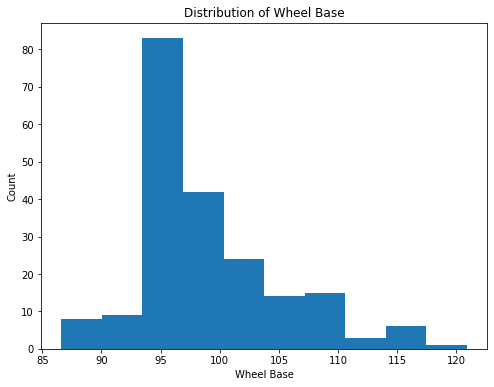

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(cars["wheel-base"], bins=10)
plt.xlabel("Wheel Base")
plt.ylabel("Count")
plt.title("Distribution of Wheel Base")
plt.show()


The "wheel-base" column represents the wheelbase measurements of the cars. To visualize the count of each unique value in the "wheel-base" column, a bar plot may not be the most suitable option since the wheelbase values are continuous and can have a wide range of values. Instead, it would be more appropriate to use a histogram to visualize the distribution of wheelbase values.

#### column : length

In [ ]:
#check for count of each unique value
cars["length"].value_counts()

157.3    15
188.8    11
171.7     7
186.7     7
166.3     7
         ..
165.6     1
187.5     1
180.3     1
208.1     1
199.2     1
Name: length, Length: 75, dtype: int64

In [ ]:
#check for null values
cars["length"].isnull().sum()

0

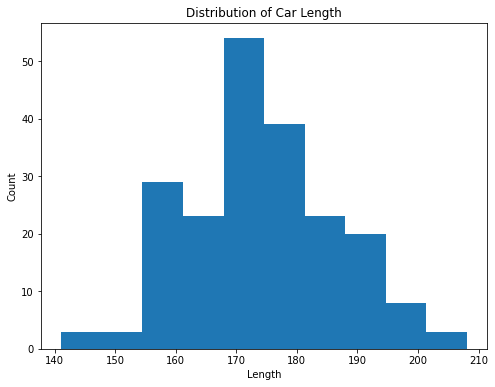

In [ ]:
#visualize
plt.figure(figsize=(8, 6))
plt.hist(cars["length"], bins=10)
plt.xlabel("Length")
plt.ylabel("Count")
plt.title("Distribution of Car Length")
plt.show()


To visualize the count of each unique value in the "length" column, a bar plot may not be the most suitable option since the length values are continuous and can have a wide range of values. Instead, it would be more appropriate to use a histogram to visualize the distribution of length values.

#### column : width

In [ ]:
#check for count of each unique value
cars["width"].value_counts()

63.8    24
66.5    23
65.4    15
63.6    11
64.4    10
68.4    10
64.0     9
65.5     8
65.2     7
64.2     6
66.3     6
65.6     6
67.2     6
67.9     5
66.9     5
65.7     4
68.9     4
64.8     4
63.9     3
70.3     3
71.7     3
71.4     3
65.0     3
68.3     2
67.7     2
64.1     2
66.1     2
69.6     2
64.6     2
72.0     1
68.0     1
70.5     1
61.8     1
66.0     1
62.5     1
70.6     1
72.3     1
66.6     1
63.4     1
60.3     1
70.9     1
66.4     1
66.2     1
68.8     1
Name: width, dtype: int64

In [ ]:
#check for null values
cars["width"].isnull().sum()

0

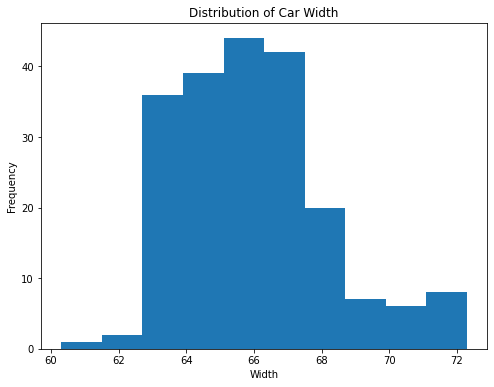

In [ ]:
#visualize
plt.figure(figsize=(8, 6))
plt.hist(cars["width"], bins=10)
plt.xlabel("Width")
plt.ylabel("Frequency")
plt.title("Distribution of Car Width")
plt.show()


#### column : height

In [ ]:
#check for count of each unique value
cars["height"].value_counts()

50.8    14
52.0    12
55.7    12
54.1    10
54.5    10
55.5     9
56.7     8
54.3     8
52.6     7
56.1     7
51.6     7
53.0     6
52.8     6
54.9     6
50.2     6
53.7     5
55.1     5
50.6     5
49.6     4
58.7     4
53.3     4
52.5     3
59.1     3
56.2     3
49.7     3
57.5     3
53.5     3
54.4     2
53.9     2
56.3     2
50.5     2
59.8     2
56.5     2
54.7     2
48.8     2
49.4     2
51.4     2
51.0     1
54.8     1
55.4     1
56.0     1
55.2     1
53.2     1
47.8     1
55.9     1
52.4     1
55.6     1
53.1     1
58.3     1
Name: height, dtype: int64

In [ ]:
#check for null values
cars["height"].isnull().sum()

0

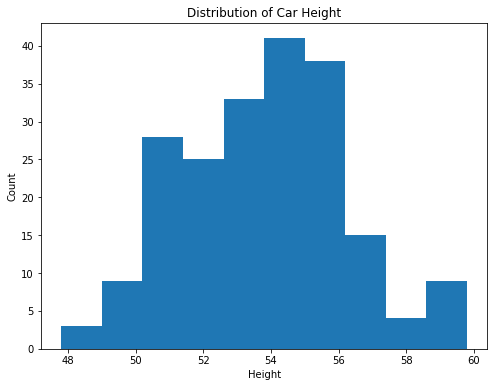

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(cars["height"], bins=10)
plt.xlabel("Height")
plt.ylabel("Count")
plt.title("Distribution of Car Height")
plt.show()


To visualize the count of each unique value in the "height" column, a bar plot may not be the most suitable option since the height values are continuous and can have a wide range of values. Instead, it would be more appropriate to use a histogram to visualize the distribution of height values.

#### column : curb-weight

In [ ]:
#check for count of each unique value
cars["curb-weight"].value_counts()

2385    4
1918    3
2275    3
1989    3
2410    2
       ..
2370    1
2328    1
2833    1
2921    1
3062    1
Name: curb-weight, Length: 171, dtype: int64

In [ ]:
#check for null values
cars["curb-weight"].isnull().sum()

0

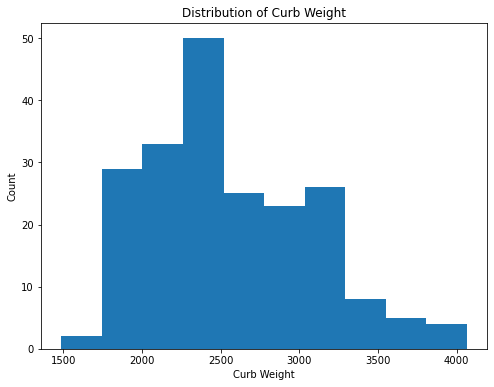

In [ ]:
#visualize
plt.figure(figsize=(8, 6))
plt.hist(cars["curb-weight"], bins=10)
plt.xlabel("Curb Weight")
plt.ylabel("Count")
plt.title("Distribution of Curb Weight")
plt.show()


To visualize the count of each unique value in the "curb-weight" column, a bar plot may not be the most suitable option since the curb weight values are continuous and can have a wide range of values. Instead, it would be more appropriate to use a histogram to visualize the distribution of curb weight values.

#### column : engine - type

In [ ]:
#check for count of each unique value
cars["engine-type"].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: engine-type, dtype: int64

In [ ]:
#check for null values
cars["engine-type"].isnull().sum()

0

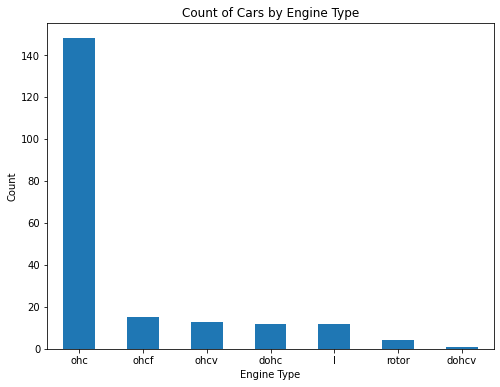

In [ ]:
engine_type_counts = cars["engine-type"].value_counts()

plt.figure(figsize=(8, 6))
engine_type_counts.plot(kind='bar')
plt.xlabel("Engine Type")
plt.ylabel("Count")
plt.title("Count of Cars by Engine Type")
plt.xticks(rotation=0)
plt.show()


#### column : num-of-cylinders

In [ ]:
#check for count of each unique value
cars["num-of-cylinders"].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: num-of-cylinders, dtype: int64

In [ ]:
#check for null values
cars["num-of-cylinders"].isnull().sum()

0

#### column : engine-size

In [ ]:
#check for count of each unique value
cars["engine-size"].value_counts()

122    15
92     15
97     14
98     14
108    13
90     12
110    12
109     8
120     7
141     7
152     6
181     6
146     6
121     6
156     5
136     5
91      5
183     4
130     4
171     3
70      3
194     3
209     3
164     3
258     2
140     2
134     2
234     2
132     2
131     2
173     1
203     1
161     1
80      1
151     1
103     1
304     1
308     1
326     1
119     1
111     1
79      1
61      1
145     1
Name: engine-size, dtype: int64

In [ ]:
#check for null values
cars["engine-size"].isnull().sum()

0

#### column : fuel-system

In [ ]:
#check for count of each unique value
cars["fuel-system"].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuel-system, dtype: int64

In [ ]:
#check for null values
cars["fuel-system"].isnull().sum()

0

#### column : bore

In [ ]:
#check for count of each unique value
cars["bore"].value_counts()

3.62    23
3.19    20
3.15    15
3.03    12
2.97    12
3.46     9
3.78     8
3.31     8
3.43     8
3.27     7
2.91     7
3.54     6
3.05     6
3.58     6
3.39     6
3.01     5
3.7      5
3.35     4
3.17     3
3.59     3
3.74     3
3.33     2
3.24     2
3.94     2
3.47     2
3.8      2
3.63     2
3.5      2
3.13     2
2.68     1
2.99     1
3.08     1
3.61     1
2.92     1
3.6      1
2.54     1
3.34     1
3.76     1
Name: bore, dtype: int64

In [ ]:
#check for null values
cars["bore"].isnull().sum()

4

#### column : stroke

In [ ]:
#check for count of each unique value
cars["stroke"].value_counts()

3.4     20
3.03    14
3.23    14
3.15    14
3.39    13
2.64    11
3.29     9
3.35     9
3.46     8
3.07     6
3.58     6
3.5      6
3.27     6
3.41     6
3.11     6
3.19     6
3.52     5
3.64     5
3.47     4
3.86     4
3.54     4
3.9      3
2.9      3
3.08     2
2.19     2
2.68     2
3.1      2
4.17     2
2.8      2
3.12     1
3.21     1
2.07     1
2.36     1
3.16     1
2.76     1
2.87     1
Name: stroke, dtype: int64

In [ ]:
#check for null values
cars["stroke"].isnull().sum()

4

#### column : compression-ratio

In [ ]:
#check for count of each unique value
cars["compression-ratio"].value_counts()

9.00     46
9.40     26
8.50     14
9.50     13
9.30     11
8.70      9
8.00      8
9.20      8
7.00      7
8.60      5
21.00     5
8.40      5
7.50      5
23.00     5
9.60      5
21.50     4
7.60      4
10.00     3
22.50     3
8.30      3
8.80      3
7.70      2
8.10      2
9.10      1
9.31      1
7.80      1
9.41      1
21.90     1
22.00     1
22.70     1
10.10     1
11.50     1
Name: compression-ratio, dtype: int64

In [ ]:
#check for null values
cars["compression-ratio"].isnull().sum()

0

#### column : horsepower

In [ ]:
#check for count of each unique value
cars["horsepower"].value_counts()

68     19
70     11
69     10
116     9
110     8
95      7
114     6
160     6
101     6
62      6
88      6
145     5
76      5
97      5
82      5
84      5
102     5
92      4
111     4
123     4
86      4
207     3
182     3
90      3
121     3
152     3
85      3
73      3
161     2
94      2
56      2
112     2
184     2
155     2
156     2
52      2
100     2
162     2
176     2
140     1
115     1
134     1
78      1
48      1
288     1
143     1
142     1
200     1
58      1
55      1
60      1
175     1
154     1
72      1
120     1
64      1
135     1
262     1
106     1
Name: horsepower, dtype: int64

In [ ]:
#check for null values
cars["horsepower"].isnull().sum()

2

#### column : peak-rpm

In [ ]:
#check for count of each unique value
cars["peak-rpm"].value_counts()

5500    37
4800    36
5000    27
5200    23
5400    13
6000     9
5800     7
5250     7
4500     7
4150     5
4200     5
4350     4
4750     4
5100     3
5900     3
4250     3
4400     3
6600     2
4650     1
5600     1
5750     1
4900     1
5300     1
Name: peak-rpm, dtype: int64

In [ ]:
#check for null values
cars["peak-rpm"].isnull().sum()

2

#### column : city-mpg

In [ ]:
#check for count of each unique value
cars["city-mpg"].value_counts()

31    28
19    27
24    22
27    14
17    13
26    12
23    12
21     8
25     8
30     8
38     7
28     7
16     6
37     6
22     4
29     3
15     3
20     3
18     3
14     2
34     1
35     1
32     1
36     1
45     1
13     1
49     1
47     1
33     1
Name: city-mpg, dtype: int64

In [ ]:
#check for null values
cars["city-mpg"].isnull().sum()

0

#### column : highway-mpg

In [ ]:
#check for count of each unique value
cars["highway-mpg"].value_counts()

25    19
38    17
24    17
30    16
32    16
34    14
37    13
28    13
29    10
33     9
22     8
31     8
23     7
27     5
43     4
42     3
26     3
41     3
19     2
39     2
18     2
16     2
20     2
36     2
47     2
46     2
54     1
17     1
53     1
50     1
Name: highway-mpg, dtype: int64

In [ ]:
#check for null values
cars["highway-mpg"].isnull().sum()

0

#### column : price

In [ ]:
#check for count of each unique value
cars["price"].value_counts()

8921     2
18150    2
8845     2
8495     2
7609     2
        ..
45400    1
16503    1
5389     1
6189     1
22625    1
Name: price, Length: 186, dtype: int64

In [ ]:
#check for null values
cars["price"].isnull().sum()

4

Our target variable is 'price', and the column contains 4 null values that cannot be filled since we need to predict that column. 
Therefore, it is better to remove those rows.

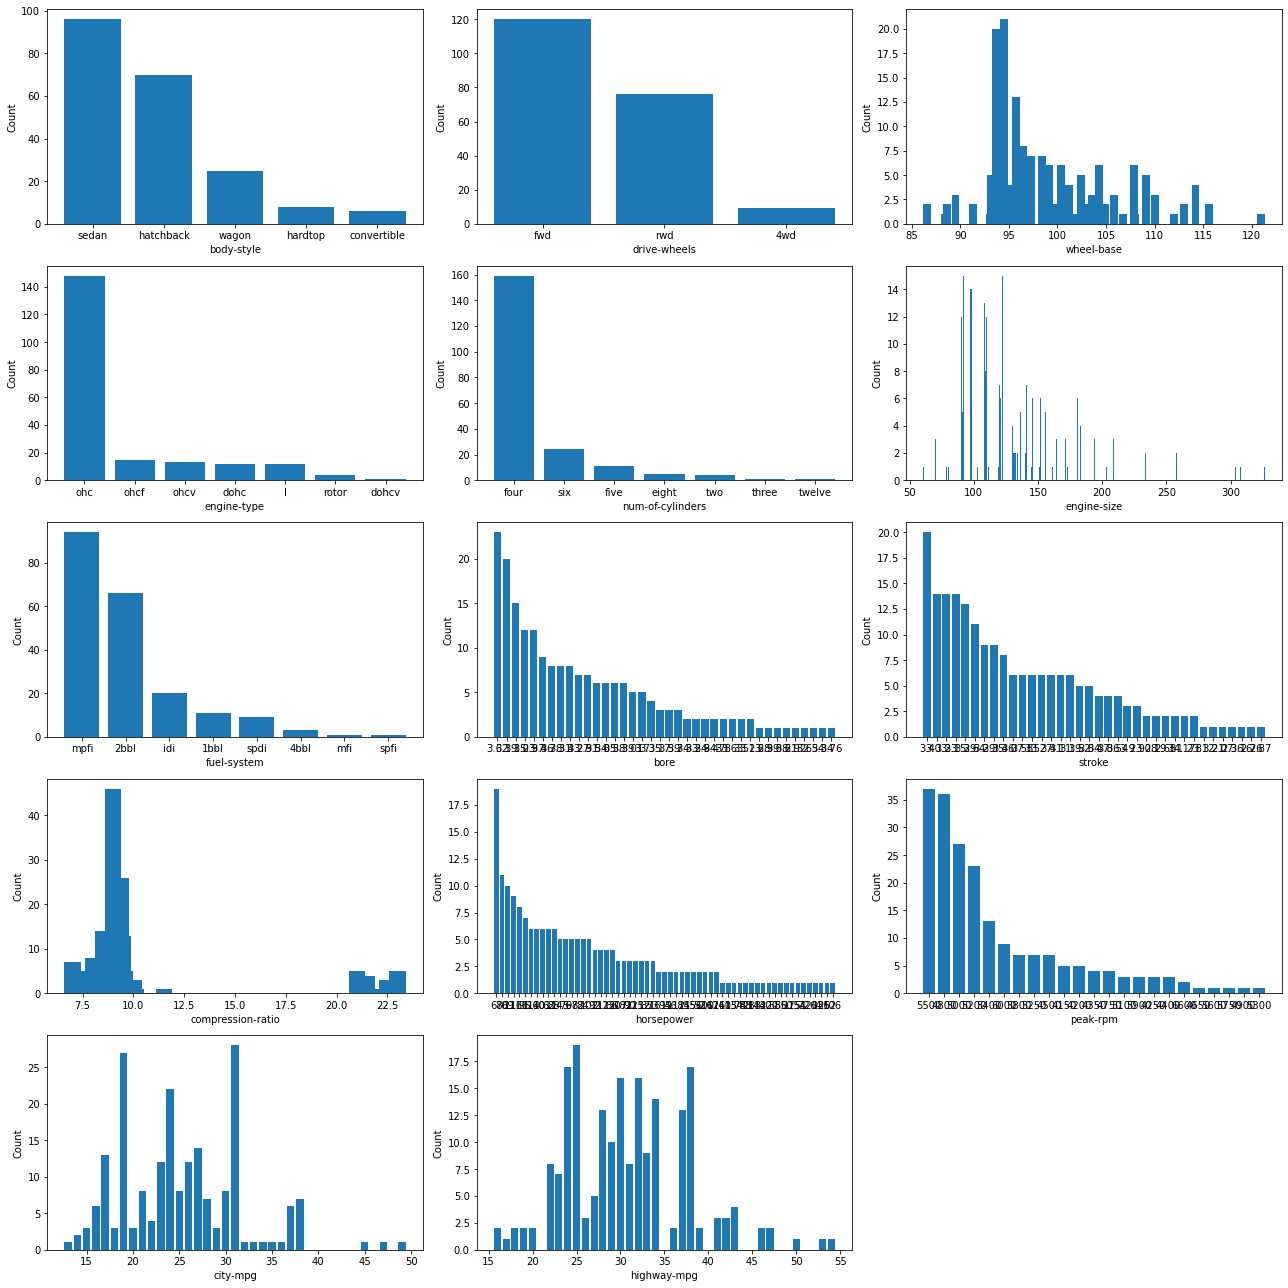

In [ ]:
attributes = ['body-style', 'drive-wheels',  'wheel-base','engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system',
              'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(18, 18))
axes = axes.flatten()

for i, attr in enumerate(attributes):
    attr_counts = cars[attr].value_counts()
    axes[i].bar(attr_counts.index, attr_counts.values)
    axes[i].set_xlabel(attr)
    axes[i].set_ylabel("Count")

# Hide empty subplots
for j in range(len(attributes), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


#### drop null values from target variable "price"

In [ ]:
cars.dropna(subset=['price'], inplace=True)


In [ ]:
#check for the shape after removing null columns from the target variable
cars.shape

(201, 26)

Earlier, we had a total of 205 rows in the dataset. However, after removing the rows with null values in the target column,
we are left with 201 rows in the updated dataset.

In [ ]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


## Fill Null Values

Due to the distinctiveness of all the features and the varying values within each feature, we will assign unique null values for each car individually.

##### change data type of the columns to fill null values

In [ ]:
#check for the dtype of the columns
cars["normalized-losses"].dtype
cars["bore"].dtype
cars["stroke"].dtype
cars["horsepower"].dtype
cars["peak-rpm"].dtype

dtype('O')

the datatype of these columns is object type . we need to convert this into float type to perform numerical operations

In [ ]:
#To convert the columns into the float data type, we can use the astype()
cars['normalized-losses'] = cars['normalized-losses'].astype('float')
cars['bore'] = cars['bore'].astype('float')
cars['stroke'] = cars['stroke'].astype('float')
cars['horsepower'] = cars['horsepower'].astype('float')
cars['peak-rpm'] = cars['peak-rpm'].astype('float')


## normalized-losses column

In [ ]:
#To fill the null values in the "normalized-losses" column where the make is "audi" with the mean value of the
#"normalized-losses" column for the "audi" make


audi_mean = cars.loc[cars['make'] == 'audi', 'normalized-losses'].mean()
cars.loc[(cars['make'] == 'audi') & (cars['normalized-losses'].isnull()), 'normalized-losses'] = audi_mean

In [ ]:
#check for remaining null values in the normalized-losses column
cars["normalized-losses"].isnull().sum()

35

In [ ]:
#To fill the missing values in the "normalized-losses" column where the make is "bmw" with the value 188
cars.loc[(cars['make'] == 'bmw') & (cars['normalized-losses'].isnull()), 'normalized-losses'] = 188

#check for remaining null values in the normalized-losses column
cars["normalized-losses"].isnull().sum()

31

there are 2 values 192 and 188, if we check in number of cylinders column where there is 4 there is 192, where number of cylinders is 6 ther noramlized losses are 188 and null value rows have number of cylinders 6 

In [ ]:
#To fill the missing values in the "normalized-losses" column where the make is "jaguar" with the value 145

cars.loc[(cars['make'] == 'jaguar') & (cars['normalized-losses'].isnull()), 'normalized-losses'] = 145

#check for remaining null values in the normalized-losses column
cars["normalized-losses"].isnull().sum()

29

In [ ]:
#To fill the missing values in the "normalized-losses" column where the make is "mercedes-benz" with the value 142

cars.loc[(cars['make'] == 'mercedes-benz') & (cars['normalized-losses'].isnull()), 'normalized-losses'] = 142

#check for remaining null values in the normalized-losses column
cars["normalized-losses"].isnull().sum()



26

In [ ]:
#To fill the missing values in the "normalized-losses" column where the make is "mitsubishi" with the value 157(mean of that make)

cars.loc[(cars['make'] == 'mitsubishi') & (cars['normalized-losses'].isnull()), 'normalized-losses'] = 157

#check for remaining null values in the normalized-losses column
cars["normalized-losses"].isnull().sum()


23

In [ ]:
#To fill the missing values in the "normalized-losses" column where the make is "peugot" with the value 161

cars.loc[(cars['make'] == 'peugot') & (cars['normalized-losses'].isnull()), 'normalized-losses'] = 161

#check for remaining null values in the normalized-losses column
cars["normalized-losses"].isnull().sum()


19

In [ ]:
#To fill the missing values in the "normalized-losses" column where the make is "mercedes-benz" with the value 119

cars.loc[(cars['make'] == 'plymouth') & (cars['normalized-losses'].isnull()), 'normalized-losses'] = 119

#check for remaining null values in the normalized-losses column
cars["normalized-losses"].isnull().sum()


18

In [ ]:
#To fill the missing values in the "normalized-losses" column where the make is "renault" with the value 150

cars.loc[(cars['make'] == 'renault') & (cars['normalized-losses'].isnull()), 'normalized-losses'] = 150

#check for remaining null values in the normalized-losses column
cars["normalized-losses"].isnull().sum()

16

In [ ]:
#To fill the null values in the "normalized-losses" column where the make is "mazda" with the mean value of the
#"normalized-losses" column for the "mazda" make


mazda_mean = cars.loc[cars['make'] == 'mazda', 'normalized-losses'].mean()
cars.loc[(cars['make'] == 'mazda') & (cars['normalized-losses'].isnull()), 'normalized-losses'] = mazda_mean

#check for remaining null values in the normalized-losses column
cars["normalized-losses"].isnull().sum()

14

In [ ]:
#To fill the null values in the "normalized-losses" column where the make is "volkswagen" with the mean value of the
#"normalized-losses" column for the "volkswagen" make


volkswagen_mean = cars.loc[cars['make'] == 'volkswagen', 'normalized-losses'].mean()
cars.loc[(cars['make'] == 'volkswagen') & (cars['normalized-losses'].isnull()), 'normalized-losses'] = volkswagen_mean

#check for remaining null values in the normalized-losses column
cars["normalized-losses"].isnull().sum()

10

In [ ]:
#To fill the null values in the "normalized-losses" column where make is "toyota" with the mean of the "normalized-losses"
#column where body style is "wagon" and make is "toyota".

toyota_mean = cars[(cars["make"] == "toyota") & (cars["body-style"] == "wagon")]["normalized-losses"].mean()

#replace the null values in the "normalized-losses" column where make is "toyota" with the calculated mean
cars.loc[(cars["make"] == "toyota") & (cars["normalized-losses"].isnull()), "normalized-losses"] = toyota_mean

#check for remaining null values in the normalized-losses column
cars["normalized-losses"].isnull().sum()

9

### column : number of doors

In [ ]:
#To fill the missing values in the "no of doors" column where the make is "mazda" with the value 4

cars.loc[(cars['make'] == 'mazda') & (cars['num-of-doors'].isnull()), 'num-of-doors'] = "four"

#check for remaining null values in the normalized-losses column
cars["num-of-doors"].isnull().sum()

1

In [ ]:
#To fill the missing values in the "no of doors" column where the make is "dodge" with the value 4

cars.loc[(cars['make'] == 'dodge') & (cars['num-of-doors'].isnull()), 'num-of-doors'] = "four"

#check for remaining null values in the normalized-losses column
cars["num-of-doors"].isnull().sum()

0

### column : horsepower

In [ ]:
#To fill the missing values in the "horsepower" column where the make is "renault" with the value 110

cars.loc[(cars['make'] == 'renault') & (cars['horsepower'].isnull()), 'horsepower'] = 110

#check for remaining null values in the normalized-losses column
cars["horsepower"].isnull().sum()

0

### column : peak-rpm

In [ ]:
#To fill the missing values in the "peak-rpm" column where the make is "renault" with the value 5250

cars.loc[(cars['make'] == 'renault') & (cars['peak-rpm'].isnull()), 'peak-rpm'] = 5250

#check for remaining null values in the normalized-losses column
cars["peak-rpm"].isnull().sum()

0

### column : bore

In [ ]:
#To fill the null values in the "bore" column where make is "mazda" with the mean of the "bore" column where make 
#is also "mazda"

mean_bore = cars[cars["make"] == "mazda"]["bore"].mean()

#replace the null values in the "bore" column where make is "mazda" with the calculated mean:
cars.loc[(cars["make"] == "mazda") & (cars["bore"].isnull()), "bore"] = mean_bore

#check for remaining null values in the normalized-losses column
cars["bore"].isnull().sum()

0

### column : stroke

In [ ]:
#To fill the null values in the "stroke" column where make is "mazda" with the mean of the "stroke" column where make 
#is also "mazda"

mean_bore = cars[cars["make"] == "mazda"]["stroke"].mean()

#replace the null values in the "bore" column where make is "mazda" with the calculated mean:
cars.loc[(cars["make"] == "mazda") & (cars["stroke"].isnull()), "stroke"] = mean_bore

#check for remaining null values in the normalized-losses column
cars["stroke"].isnull().sum()

0

## Define X and y

Since we focus on predicting the price of the cars. Our target column, denoting Price, will be represented as y, while the remaining columns containing car characteristics will be represented as X.

In [ ]:
X = cars.drop("price", axis = 1)
y = cars["price"]

In [ ]:
#print X
X

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,six,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27


In [ ]:
#print y
y

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 201, dtype: object

In [ ]:
# Calculate the correlation matrix
correlation_matrix = X.corr()
correlation_matrix

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
symboling,1.000000,0.453911,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.145480,-0.003382,-0.182196,0.076002,0.279964,-0.035527,0.036233
normalized-losses,0.453911,1.000000,0.068589,0.156407,0.207716,-0.318737,0.230031,0.251406,0.058350,0.104599,-0.122452,0.342960,0.194518,-0.328522,-0.290685
wheel-base,-0.535987,0.068589,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.494957,0.156392,0.250313,0.370407,-0.361327,-0.470606,-0.543304
length,-0.365404,0.156407,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.610160,0.122761,0.159733,0.580351,-0.284815,-0.665192,-0.698142
width,-0.242423,0.207716,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.545030,0.188539,0.189867,0.615467,-0.244888,-0.633531,-0.680635
height,-0.550160,-0.318737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.185839,-0.065370,0.259737,-0.087589,-0.310833,-0.049800,-0.104812
curb-weight,-0.233118,0.230031,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644784,0.166635,0.156433,0.757753,-0.279437,-0.749543,-0.794889
engine-size,-0.110581,0.251406,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.576641,0.202265,0.028889,0.822740,-0.256314,-0.650546,-0.679571
bore,-0.145480,0.058350,0.494957,0.610160,0.545030,0.185839,0.644784,0.576641,1.000000,-0.055794,0.001873,0.566926,-0.271849,-0.577683,-0.587552
stroke,-0.003382,0.104599,0.156392,0.122761,0.188539,-0.065370,0.166635,0.202265,-0.055794,1.000000,0.187309,0.101810,-0.053119,-0.037587,-0.037756


Text(0.5, 1.0, 'Correlation Matrix')

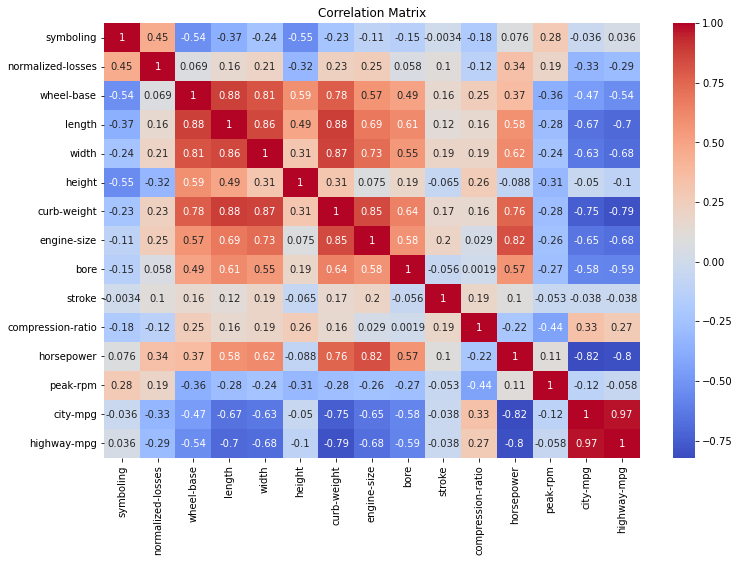

In [ ]:
# Visualize the correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

## Split Train and Test

To split the data into training and testing sets, we will utilize the train_test_split module. This module allows us to divide our dataset into two separate subsets: one for training our classification model and the other for evaluating its performance.

module : from sklearn.model_selection import train_test_split

In [ ]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

splitting training data into 80% and testing data into 20%, we will set the random_state parameter to 42

In [ ]:
#check for the shape of  X_train
X_train.shape

(160, 25)

In [ ]:
#check for the shape of  X_test
X_test.shape

(41, 25)

## Preprocessing

### 1. fill null values

In [ ]:
#check for null values in X_train
X_train.isnull().sum()

symboling            0
normalized-losses    7
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
dtype: int64

In [ ]:
#calculate median of "normalized-losses" column in X_train dataset
mean = X_train["normalized-losses"].mean()
mean

124.78877995642702

In [ ]:
#fill null vales in "normalized-losses" column with median 
X_train["normalized-losses"] = X_train["normalized-losses"].fillna(mean)

In [ ]:
# check for null values in "normalized-lossess" column after filling  null values
X_train["normalized-losses"].isnull().sum()

0

In [ ]:
#check for null values in X_test
X_test.isnull().sum()

symboling            0
normalized-losses    2
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
dtype: int64

In [ ]:
#calculate median of "normalized-losses" column in X_test dataset
mean_test = X_test["normalized-losses"].mean()
mean_test

129.62008547008548

In [ ]:
#fill null vales in "normalized-losses" column with mean 
X_test["normalized-losses"] = X_test["normalized-losses"].fillna(mean_test)

In [ ]:
# check for null values in "normalized-lossess" column after filling  null values
X_test["normalized-losses"].isnull().sum()

0

### 2. Drop unnecessary columns

In [ ]:
# List of unnecessary columns
unnecessary_columns = ["symboling", "length", "width", "height", "highway-mpg","num-of-doors"]

# Drop the unnecessary columns
X_train.drop(unnecessary_columns, axis=1, inplace=True)
X_test.drop(unnecessary_columns, axis=1, inplace=True)

In [ ]:
X_train.head()

,normalized-losses,make,fuel-type,aspiration,body-style,drive-wheels,engine-location,wheel-base,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg
202,95.0,volvo,gas,std,sedan,rwd,front,109.1,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18
39,85.0,honda,gas,std,sedan,fwd,front,96.5,2304,ohc,four,110,1bbl,3.15,3.58,9.0,86.0,5800.0,27
25,148.0,dodge,gas,std,sedan,fwd,front,93.7,1989,ohc,four,90,2bbl,2.97,3.23,9.4,68.0,5500.0,31
125,186.0,porsche,gas,std,hatchback,rwd,front,94.5,2778,ohc,four,151,mpfi,3.94,3.11,9.5,143.0,5500.0,19
200,95.0,volvo,gas,std,sedan,rwd,front,109.1,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23


In [ ]:
X_test.head()

,normalized-losses,make,fuel-type,aspiration,body-style,drive-wheels,engine-location,wheel-base,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg
98,168.0,nissan,gas,std,hardtop,fwd,front,95.1,2008,ohc,four,97,2bbl,3.15,3.29,9.40,69.0,5200.0,31
16,188.0,bmw,gas,std,sedan,rwd,front,103.5,3380,ohc,six,209,mpfi,3.62,3.39,8.00,182.0,5400.0,16
31,137.0,honda,gas,std,hatchback,fwd,front,86.6,1819,ohc,four,92,1bbl,2.91,3.41,9.20,76.0,6000.0,31
162,91.0,toyota,gas,std,sedan,fwd,front,95.7,2140,ohc,four,98,2bbl,3.19,3.03,9.00,70.0,4800.0,28
132,150.0,saab,gas,std,hatchback,fwd,front,99.1,2658,ohc,four,121,mpfi,3.54,3.07,9.31,110.0,5250.0,21


In [ ]:
print(X_train.shape)
print(X_test.shape)

(160, 19)
(41, 19)


The following columns were dropped because These columns were considered less relevant or not directly related to determining the price of a car, They may not have a direct impact on the pricing decision or are redundant with other features.By removing them, we focus on the most important features that influence car prices.


### 3. Encoding

In [ ]:
# Select columns with object data types
object_columns = cars.select_dtypes(include=['object'])

object_columns

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,price
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,13495
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,16500
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,16500
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi,13950
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi,17450
...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,four,sedan,rwd,front,ohc,four,mpfi,16845
201,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi,19045
202,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi,21485
203,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi,22470


We will use a technique called One-Hot Encoding for certain columns in our dataset. These columns have categories that are not related in any specific order. One-Hot Encoding will convert these categories into separate columns with 1s and 0s, indicating the presence or absence of each category. This helps our regression model to understand and use the categorical information properly without assuming any numerical order.

module: from sklearn.preprocessing import OneHotEncoder

In [ ]:
cat_columns=['make', 'fuel-type',"aspiration","body-style","drive-wheels","engine-location","engine-type","fuel-system"]

# Initialize the OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')

# Fit and transform the training data
train_encoded = ohe.fit_transform(X_train[cat_columns])

# Transform the testing data using the fitted encoder
test_encoded = ohe.transform(X_test[cat_columns])

# Create DataFrames for the encoded data
train_encoded_df = pd.DataFrame(train_encoded.toarray(), columns=ohe.get_feature_names(cat_columns))
test_encoded_df = pd.DataFrame(test_encoded.toarray(), columns=ohe.get_feature_names(cat_columns))



C:\Users\avino\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\avino\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# Display the encoded training set
print("Encoded Training Set:")
train_encoded_df

Encoded Training Set:


,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
156,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
# Display the encoded testing set
print("\nEncoded Testing Set:")
test_encoded_df.head()


Encoded Testing Set:


,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
# Reset the index of the original data
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

# Reset the index of the encoded data
train_encoded_df.reset_index(drop=True, inplace=True)
test_encoded_df.reset_index(drop=True, inplace=True)


In [ ]:
# Concatenate the encoded data with the original data
X_train = pd.concat([X_train.drop(cat_columns, axis=1), train_encoded_df], axis=1)
X_test = pd.concat([X_test.drop(cat_columns, axis=1), test_encoded_df], axis=1)


In [ ]:
# Display the encoded and concatenated training set
print("Encoded and Concatenated Training Set:")
X_train

Encoded and Concatenated Training Set:


,normalized-losses,wheel-base,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,95.0,109.1,3012,six,173,3.58,2.87,8.8,134.0,5500.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,85.0,96.5,2304,four,110,3.15,3.58,9.0,86.0,5800.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,148.0,93.7,1989,four,90,2.97,3.23,9.4,68.0,5500.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,186.0,94.5,2778,four,151,3.94,3.11,9.5,143.0,5500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,95.0,109.1,2952,four,141,3.78,3.15,9.5,114.0,5400.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,161.0,114.2,3230,four,120,3.46,3.19,8.4,97.0,5000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
156,188.0,103.5,3230,six,209,3.62,3.39,8.0,182.0,5400.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
157,128.0,94.5,2028,four,97,3.15,3.29,9.4,69.0,5200.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
158,122.0,97.3,2209,four,109,3.19,3.40,9.0,85.0,5250.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
# Display the encoded and concatenated testing set
print("\nEncoded and Concatenated Testing Set:")
X_test.head()


Encoded and Concatenated Testing Set:


,normalized-losses,wheel-base,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,168.000000,95.1,2008,four,97,3.150000,3.290000,9.40,69.0,5200.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,188.000000,103.5,3380,six,209,3.620000,3.390000,8.00,182.0,5400.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,137.000000,86.6,1819,four,92,2.910000,3.410000,9.20,76.0,6000.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,91.000000,95.7,2140,four,98,3.190000,3.030000,9.00,70.0,4800.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,150.000000,99.1,2658,four,121,3.540000,3.070000,9.31,110.0,5250.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,119.000000,93.7,1918,four,90,2.970000,3.230000,9.40,68.0,5500.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,142.000000,96.6,3685,eight,234,3.460000,3.100000,8.30,155.0,4750.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,65.000000,102.4,2414,four,122,3.310000,3.540000,8.70,92.0,4200.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,197.000000,102.9,3016,six,171,3.270000,3.350000,9.30,161.0,5200.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,145.000000,113.0,4066,six,258,3.630000,4.170000,8.10,176.0,4750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


for number of cylinders column, we can simply convert categorical value of numbers into numerical value.

In [ ]:
# Define the mapping for label encoding
cylinder_mapping = {"four": 4, "six": 6, "eight": 8, "two": 2, "five": 5, "three": 3, "twelve": 12}

#train data

# Label encode the "num-of-cylinders" column on train data
X_train["num-of-cylinders"] = X_train["num-of-cylinders"].replace(cylinder_mapping)

#test data

# Label encode the "num-of-cylinders" column on test data
X_test["num-of-cylinders"] = X_test["num-of-cylinders"].replace(cylinder_mapping)

In [ ]:
X_train.head()

,normalized-losses,wheel-base,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,95.0,109.1,3012,6,173,3.58,2.87,8.8,134.0,5500.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,85.0,96.5,2304,4,110,3.15,3.58,9.0,86.0,5800.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,148.0,93.7,1989,4,90,2.97,3.23,9.4,68.0,5500.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,186.0,94.5,2778,4,151,3.94,3.11,9.5,143.0,5500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,95.0,109.1,2952,4,141,3.78,3.15,9.5,114.0,5400.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
X_test.head()

,normalized-losses,wheel-base,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,168.0,95.1,2008,4,97,3.15,3.29,9.40,69.0,5200.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,188.0,103.5,3380,6,209,3.62,3.39,8.00,182.0,5400.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,137.0,86.6,1819,4,92,2.91,3.41,9.20,76.0,6000.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,91.0,95.7,2140,4,98,3.19,3.03,9.00,70.0,4800.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,150.0,99.1,2658,4,121,3.54,3.07,9.31,110.0,5250.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
print(X_train.shape)
print(X_test.shape)

(160, 61)
(41, 61)


now, that all the features are encoded we can now apply scaling technique

### 4. Scaling

libraries :

       import seaborn as sns
       from sklearn.preprocessing import StandardScaler

To visualize whether scaling is necessary for the numerical features, you can create box plots of the features before and after scaling. This will help you assess the range and distribution of the values

In [ ]:
#initialize StandardScaler
SS = StandardScaler()

###### train data

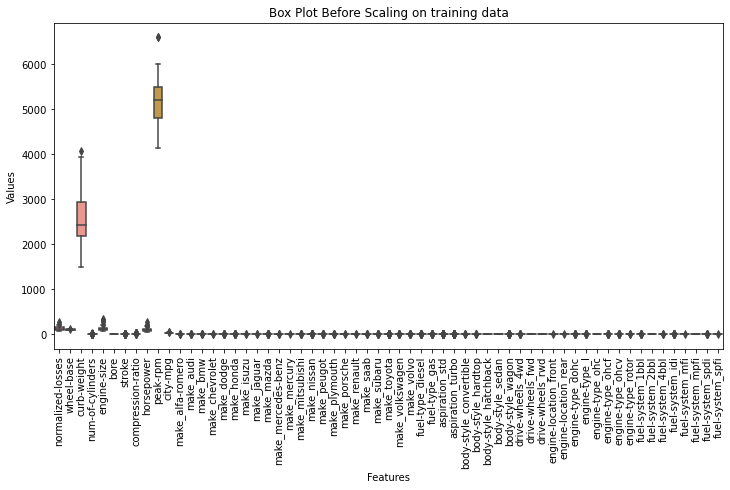

In [ ]:
# Plot box plot before scaling on training data
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_train)
plt.xticks(rotation=90)  # Rotate x-ticks by 90 degrees
plt.title('Box Plot Before Scaling on training data')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

The box plots shows huge variations in the ranges and scales of different features, it indicates the need for scaling. We can apply scaling techniques such as StandardScaler or MinMaxScaler to normalize the features and make them comparable.

In this case we are applying Standard Scaler

In [ ]:
# fit StandardScaler to train data
X_train = SS.fit_transform(X_train)

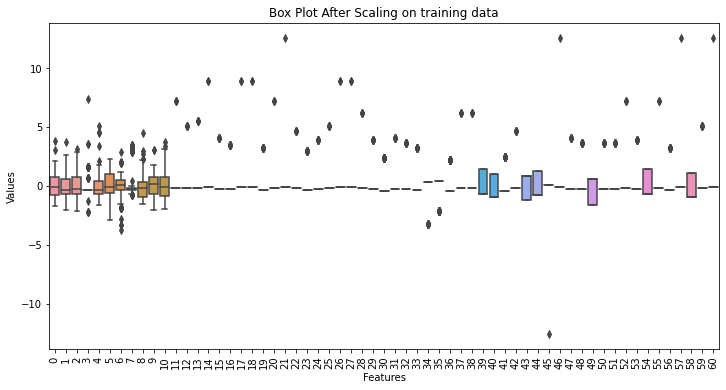

In [ ]:
# Plot box plot after scaling on training data
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_train)
plt.xticks(rotation=90)  # Rotate x-ticks by 90 degrees
plt.title('Box Plot After Scaling on training data')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

###### test data

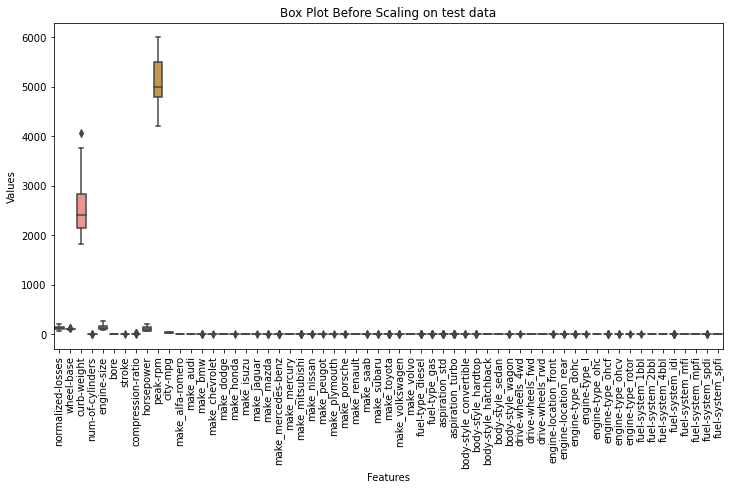

In [ ]:
# Plot box plot before scaling on test data
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_test)
plt.xticks(rotation=90)  # Rotate x-ticks by 90 degrees
plt.title('Box Plot Before Scaling on test data')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

In [ ]:
#using StandardScaler to test data
X_test = SS.transform(X_test)

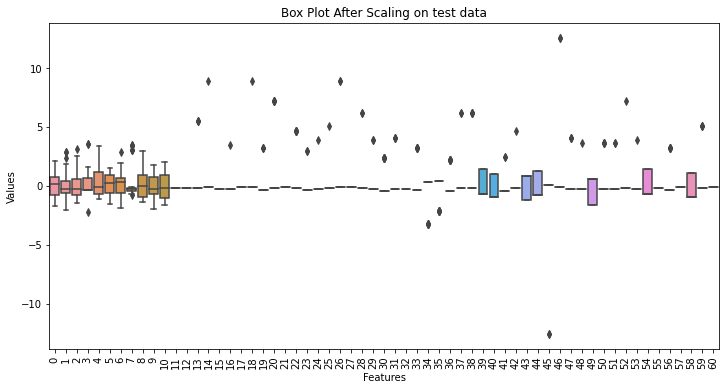

In [ ]:
# Plot box plot After scaling on test data
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_test)
plt.xticks(rotation=90)  # Rotate x-ticks by 90 degrees
plt.title('Box Plot After Scaling on test data')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

In [ ]:
X_test.shape

(41, 61)

### 5.  Feature Extraction

for feature extaction I will apply Principal component analysis (PCA) here. PCA is an unsupervised linear transformation technique which is primarily used for feature extraction and dimensionality reduction.Since we have 61 features, feature reduction is very important

module: from sklearn.decomposition import PCA

In [ ]:
# Create a PCA object 
pca = PCA()

In [ ]:
# Apply PCA transformation on the training data 
X_train = pca.fit_transform(X_train)


# Apply PCA transformation on the test data 
X_test = pca.transform(X_test)


In [ ]:
# Print the explained variance ratio
print("Explained variance ratio : \n", pca.explained_variance_ratio_)

# Print the shape of the transformed train and test data
print("Shape of X_train_pca : \n", X_train.shape)
print("Shape of X_test_pca : \n", X_test.shape)

Explained variance ratio : 
 [1.36182636e-01 9.30281060e-02 6.05757509e-02 5.08096939e-02
 4.89436571e-02 4.54522409e-02 3.81242325e-02 3.54147041e-02
 3.43767735e-02 3.25818526e-02 3.14344942e-02 2.73452460e-02
 2.50824343e-02 2.41911416e-02 2.34754679e-02 2.15812957e-02
 2.05768605e-02 1.96304486e-02 1.86093999e-02 1.77611769e-02
 1.74122363e-02 1.69199267e-02 1.64306992e-02 1.53683493e-02
 1.37462277e-02 1.33985506e-02 1.11695692e-02 1.05110421e-02
 1.03955985e-02 9.28443189e-03 8.73507069e-03 7.63173778e-03
 6.45428141e-03 6.20990626e-03 5.15656672e-03 4.91389353e-03
 3.65520151e-03 3.44411425e-03 2.88981797e-03 2.34344331e-03
 1.87857021e-03 1.73221888e-03 1.48051740e-03 1.15809819e-03
 8.34263113e-04 6.26859465e-04 4.33246823e-04 3.28328758e-04
 2.06198656e-04 7.34205150e-05 2.68572894e-32 4.26256486e-33
 3.23974983e-33 1.89100893e-33 1.62938696e-33 6.37138423e-34
 5.59427324e-34 5.59427324e-34 5.59427324e-34 1.65498389e-34
 7.04514663e-35]
Shape of X_train_pca : 
 (160, 61)
Shap

In [ ]:
#X_train
print("X_train data : \n",X_train)

#X_test
print("X_test data :\n ",X_test)

X_train data : 
 [[ 4.13881091e+00 -2.02875716e+00 -2.02166593e-01 ...  2.65002459e-16
  -2.37644094e-16  2.71220620e-17]
 [-2.63780532e+00 -2.09706500e-01 -1.69108383e+00 ...  6.21672116e-17
  -5.27073024e-17  8.37994850e-17]
 [-3.19250834e+00  6.48988538e-02 -4.62950064e-01 ... -9.33089008e-17
  -8.67570969e-17 -1.93312817e-17]
 ...
 [-3.03879183e+00 -1.63920048e-01 -2.81175303e-01 ... -5.97524641e-18
   3.11807130e-17  6.38082149e-17]
 [-1.27946417e+00 -1.26491319e-01 -8.89273165e-01 ...  6.76428122e-17
   1.44091221e-17 -4.03528562e-17]
 [ 4.13502936e+00 -2.15782125e+00 -1.57035465e+00 ... -6.20618285e-17
  -7.58369457e-17 -1.72797296e-16]]
X_test data :
  [[-2.13949538e+00 -6.37342676e-01  1.64550312e-01 ...  1.57429899e-16
   3.13813369e-17  1.22243795e-15]
 [ 4.14344545e+00 -2.17482893e+00 -1.84400608e+00 ... -6.01945303e-16
  -5.20260728e-16  2.37115015e-16]
 [-4.23661566e+00 -6.39281875e-01 -1.76147321e+00 ...  4.64075964e-17
   1.14648064e-16  5.67037736e-17]
 ...
 [ 1.674876

PCA is applied separately on the scaled train and test data using the fit_transform and transform methods. The explained_variance_ratio_ attribute is printed to see the amount of variance explained by each principal component.

Finally, the shape of the transformed train and test data is printed to verify the dimensionality reduction achieved through PCA.

Now that we have completed three important steps in data preprocessing, which include dropping columns, scaling the features using StandardScaler, and performing feature extraction using PCA, our data is now ready to be used for model fitting. These preprocessing steps have prepared the data by removing unnecessary columns, standardizing the feature scales, and reducing the dimensionality through PCA, enabling us to proceed with training our model on this refined and transformed dataset.

## Model Comparison

### 1. LinearRegression
from sklearn.linear_model import LinearRegression

In [ ]:
# Create and fit the Linear Regression model
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

# Predict on the test set
y_pred = linear_regression.predict(X_test)

# Evaluate the model
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R2-score
r2 = r2_score(y_test, y_pred)

# Print the metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R2-score:", r2)


Mean Squared Error (MSE): 3.887578529603833e+28
Mean Absolute Error (MAE): 30792692077468.805
R2-score: -3.1775080221988264e+20


### 2. Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Create and fit the Decision Tree Regression model
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)

# Predict on the test set
y_pred = decision_tree.predict(X_test)


# Evaluate the model
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R2-score
r2 = r2_score(y_test, y_pred)

# Print the metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R2-score:", r2)


Mean Squared Error (MSE): 10601716.878048781
Mean Absolute Error (MAE): 2369.609756097561
R2-score: 0.9133469840607603


### 3. Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Create and fit the Random Forest Regression model
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)

# Predict on the test set
y_pred = random_forest.predict(X_test)

# Evaluate the model
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R2-score
r2 = r2_score(y_test, y_pred)

# Print the metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R2-score:", r2)


Mean Squared Error (MSE): 20179907.302163295
Mean Absolute Error (MAE): 2753.364613821138
R2-score: 0.8350597503006918


### Support Vector Regression
from sklearn.svm import SVR

In [ ]:
# Create and fit the Support Vector Regression model
svr = SVR()
svr.fit(X_train, y_train)

# Predict on the test set
y_pred = svr.predict(X_test)

# Evaluate the model
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R2-score
r2 = r2_score(y_test, y_pred)

# Print the metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R2-score:", r2)


Mean Squared Error (MSE): 149241026.71963352
Mean Absolute Error (MAE): 7947.505188402194
R2-score: -0.21981988539058572


## Model Evaluation

Based on the evaluation metrics , here is the interpretation for each model:

Linear Regression:

    Mean Squared Error (MSE): 3.887578529603833e+28
    Mean Absolute Error (MAE): 30792692077468.805
    R2-score: -3.1775080221988264e+20
The Linear Regression model performs poorly, with extremely high MSE and MAE values. The negative R2-score indicates that the model performs worse than simply using the mean of the target variable for predictions. It fails to capture the relationship between the features and the car prices effectively.

Decision Tree:

    Mean Squared Error (MSE): 10601716.878048781
    Mean Absolute Error (MAE): 2369.609756097561
    R2-score: 0.9133469840607603
    
The Decision Tree Regression model shows significantly improved performance compared to Linear Regression. It exhibits relatively low MSE and MAE values, indicating better accuracy in predicting car prices. The high R2-score suggests that the model explains a substantial portion of the variance in the data and fits the car price prediction task quite well.

Random Forest:

    Mean Squared Error (MSE): 20179907.302163295
    Mean Absolute Error (MAE): 2753.364613821138
    R2-score: 0.8350597503006918
    
The Random Forest Regression model performs well, with relatively low MSE and MAE values. It outperforms the Linear Regression model, demonstrating better accuracy in predicting car prices. The R2-score of 0.835 indicates a good fit to the data, explaining a significant portion of the variance in the car prices.

Support Vector Machine (SVM):

    Mean Squared Error (MSE): 149241026.71963352
    Mean Absolute Error (MAE): 7947.505188402194
    R2-score: -0.21981988539058572
    
The SVR model performs poorly compared to the other models. It exhibits high MSE and MAE values, indicating lower accuracy in predicting car prices. The negative R2-score suggests that the model does not fit the data well and fails to capture the underlying relationship between the features and car prices.

Overall, based on the evaluation metrics, the Decision Tree Regression model performs the best among the four models. It demonstrates relatively low MSE and MAE values, indicating better accuracy and precision in predicting car prices. Additionally, it has a high R2-score, suggesting a good fit to the data and a significant explanation of the variance in the car prices.

The Random Forest Regression model also performs well, providing competitive accuracy and model fit. However, it slightly lags behind the Decision Tree Regression model in terms of the evaluation metrics.

On the other hand, the Linear Regression model performs poorly, while the SVR model shows the weakest performance among the four models.

Therefore, based on this model evaluation, the Decision Tree Regression model appears to be the most suitable choice for  the  car price prediction task, providing accurate and reliable predictions.

## Hyperparameter Tuning

module : from sklearn.model_selection import GridSearchCV

Hyperparameter tuning is the process of finding the optimal values for the hyperparameters of a machine learning algorithm. Hyperparameters are configuration parameters that are set before the learning process begins and are not learned from the data. They control the behavior of the learning algorithm and can have a significant impact on the performance of the model.

The goal of hyperparameter tuning is to find the combination of hyperparameter values that results in the best performance of the model on unseen data. It helps to improve the model's accuracy, generalization, and robustness.

There are several methods for hyperparameter tuning, including:

    Grid Search CV
    Random Search CV
    Bayesian Optimization
    Genetic Algorithms

In [ ]:
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Decision Tree Regression model
decision_tree = DecisionTreeRegressor()

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Fit the best model on the training data
best_model.fit(X_train, y_train)

# Predict on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Best Parameters:", best_params)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R2-score:", r2)


Best Parameters: {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2}
Mean Squared Error (MSE): 21537189.576416876
Mean Absolute Error (MAE): 2911.36268531803
R2-score: 0.8239660186063034


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Random Forest Regression model
random_forest = RandomForestRegressor()

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Fit the best model on the training data
best_model.fit(X_train, y_train)

# Predict on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Best Parameters:", best_params)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R2-score:", r2)


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Mean Squared Error (MSE): 22542077.768463176
Mean Absolute Error (MAE): 2830.5147372262877
R2-score: 0.8157525760550467


## Final Model

In [ ]:
# Create and fit the Decision Tree Regression model
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)

# Predict on the test set
y_pred = decision_tree.predict(X_test)


# Evaluate the model
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R2-score
r2 = r2_score(y_test, y_pred)

# Print the metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R2-score:", r2)

Mean Squared Error (MSE): 10364759.219512194
Mean Absolute Error (MAE): 2206.048780487805
R2-score: 0.9152837548685726


### Feature importances

check the feature importances using a Decision Tree model and visualize them

In [ ]:
# Get the feature importances from the trained model
importances = decision_tree.feature_importances_
importances

array([8.00686726e-01, 2.74545997e-03, 1.28292687e-05, 8.65978548e-06,
       1.67299932e-04, 5.78330559e-03, 1.35692072e-03, 1.12448957e-06,
       3.34516486e-03, 5.79652379e-04, 8.65908091e-03, 1.87923869e-02,
       1.35257590e-03, 2.39835520e-04, 1.43618988e-04, 3.72401354e-05,
       1.97474901e-02, 3.30514186e-04, 5.76596858e-06, 1.43223231e-04,
       5.64045900e-04, 7.54863635e-03, 1.07850808e-05, 7.99096599e-03,
       1.81199663e-04, 3.47923061e-03, 3.72891107e-05, 0.00000000e+00,
       4.48972479e-04, 1.34100842e-03, 8.49310717e-05, 4.43537336e-02,
       6.17047767e-10, 1.01223230e-02, 3.90225418e-04, 4.77235412e-03,
       3.47729574e-02, 4.13063202e-04, 1.65261011e-03, 9.90500547e-05,
       3.84397905e-06, 1.94244123e-05, 2.79849460e-03, 1.68615124e-03,
       3.68793631e-04, 1.12156677e-04, 9.33822082e-03, 1.46113031e-03,
       9.88167308e-04, 8.21359710e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      